In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
dataset = pd.read_csv('Data Biaya Perawatan Rumah Sakit.csv')
x = dataset.iloc[:, [2,3]].values
y = dataset.iloc[:, -1].values

In [5]:
print(x)

[[    25  17000]
 [    65  22000]
 [    22  10000]
 [    27  30000]
 [    19  15000]
 [    38  20000]
 [    48  13000]
 [    32 150000]
 [    25  33000]
 [    35  65000]]


In [6]:
print(y)

[0 0 1 0 1 0 0 1 0 0]


In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.25, random_state = 0)

In [8]:
print(x_train)

[[    35  65000]
 [    65  22000]
 [    48  13000]
 [    32 150000]
 [    27  30000]
 [    25  17000]
 [    38  20000]]


In [9]:
print(x_test)

[[   22 10000]
 [   25 33000]
 [   19 15000]]


In [10]:
print(y_train)

[0 0 0 1 0 0 0]


In [11]:
print(y_test)

[1 0 1]


In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test  = sc.transform(x_test)

In [13]:
print(x_train)

[[-0.2772307   0.43150291]
 [ 2.05150719 -0.50967372]
 [ 0.73188905 -0.70666418]
 [-0.51010449  2.29196834]
 [-0.89822747 -0.3345711 ]
 [-1.05347667 -0.61911287]
 [-0.04435691 -0.55344938]]


In [14]:
print(x_test)

[[-1.28635045 -0.77232767]
 [-1.05347667 -0.26890761]
 [-1.51922424 -0.66288853]]


In [15]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5 , metric = 'minkowski', p = 2)
classifier.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [16]:
y_pred = classifier.predict(x_test)

In [17]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1 0]
 [2 0]]


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


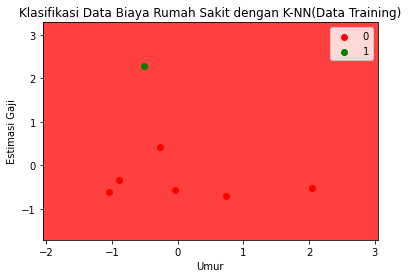

In [18]:
from matplotlib.colors import ListedColormap
x_set, y_set = x_train, y_train
x1, x2 = np.meshgrid(np.arange(start = x_set[:,0].min()-1, stop = x_set[:, 0].max() + 1, step=0.01),
                     np.arange(start = x_set[:,1].min()-1, stop = x_set[:, 1].max() + 1, step=0.01))
plt.contourf(x1 , x2,classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i , j in enumerate(np.unique(y_set)) :
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j , 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Klasifikasi Data Biaya Rumah Sakit dengan K-NN(Data Training)')
plt.xlabel('Umur')
plt.ylabel('Estimasi Gaji')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


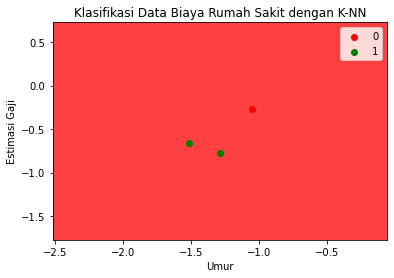

In [19]:
from matplotlib.colors import ListedColormap
x_set, y_set = x_test, y_test
x1, x2 = np.meshgrid(np.arange(start = x_set[:,0].min()-1, stop = x_set[:, 0].max() + 1, step=0.01),
                     np.arange(start = x_set[:,1].min()-1, stop = x_set[:, 1].max() + 1, step=0.01))
plt.contourf(x1 , x2,classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i , j in enumerate(np.unique(y_set)) :
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j , 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Klasifikasi Data Biaya Rumah Sakit dengan K-NN')
plt.xlabel('Umur')
plt.ylabel('Estimasi Gaji')
plt.legend()
plt.show()